# **Koronavirüs (Covid-19) Salgını - Türkiye'nin Durumu**

## Sayı: 36  (16 Haziran 2021)

### Hazırlayan: Doğan Yiğit Yenigün (toUpperCase78)

**Her güne ait tüm sayısal veriler, Türkiye'de ilk vakanın görüldüğü 11 Mart 2020'den beri T. C. Sağlık Bakanlığı Covid-19 Bilgilendirme Sayfası'nda günlük olarak yayımlanan "Türkiye Günlük Koronavirüs Tablosu"ndan alınmaktadır.**

### Referans: [covid19.saglik.gov.tr](https://covid19.saglik.gov.tr/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid19TR = pd.read_csv('covid_19_Turkiye_2021_06_16.csv')

In [2]:
covid19TR = covid19TR.set_index('Tarih')
covid19TR['Günlük Vaka'] = covid19TR['Günlük Vaka'].fillna(0).astype(int)
covid19TR['Toplam Vaka'] = covid19TR['Toplam Vaka'].fillna(0).astype(int)
covid19TR['Toplam Test'] = covid19TR['Toplam Test'].fillna(0).astype(int)
covid19TR['Ağır Hasta'] = covid19TR['Ağır Hasta'].fillna(0).astype(int)
covid19TR['Hasta Artış'] = covid19TR['Toplam Hasta'].diff().fillna(0).astype(int)
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff().fillna(0).astype(int)
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff().fillna(0).astype(int)
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff().fillna(0).astype(int)
covid19TR['Hasta +/-'] = covid19TR['Hasta Artış'].diff().fillna(0.).astype(int)
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff().fillna(0).astype(int)
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff().fillna(0).astype(int)
covid19TR['Vaka +/-'] = covid19TR['Günlük Vaka'].diff().fillna(0).astype(int)
covid19TR['Test +/-'] = covid19TR['Test Artış'].diff().fillna(0).astype(int)

In [3]:
ind = 274
while covid19TR.iloc[ind,8] != 0:
    covid19TR.iloc[ind-1,9] = covid19TR.iloc[ind,9] - covid19TR.iloc[ind,8]
    ind -= 1

### **Son 20 Güne Dair Sayısal Bilgiler**

In [4]:
covid19TR[['Toplam Test', 'Toplam Vaka', 'Toplam Hasta', 'Toplam Vefat',
           'Toplam İyileşen', 'Zatürre Oranı(%)', 'Ağır Hasta', 'Günlük Vaka']].tail(20)

,Toplam Test,Toplam Vaka,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Zatürre Oranı(%),Ağır Hasta,Günlük Vaka
Tarih,,,,,,,,
2021-05-28,53478278,5228322,837444,47134,5083099,3.1,1454,7773
2021-05-29,53700891,5235978,838049,47271,5094279,3.1,1391,7656
2021-05-30,53919848,5242911,838631,47406,5105042,3.1,1390,6933
2021-05-31,54139309,5249404,839227,47527,5114624,2.8,1339,6493
2021-06-01,54362791,5256516,839829,47656,5124081,2.8,1241,7112
2021-06-02,54586941,5263697,840415,47768,5131453,2.8,1213,7181
2021-06-03,54809788,5270299,840978,47882,5139993,2.8,1219,6602
2021-06-04,55034469,5276468,841530,47976,5147610,2.8,1183,6169
2021-06-05,55250625,5282594,842072,48068,5154771,2.8,1147,6126


**NOT 1:** 29 Temmuz 2020'den itibaren _Toplam Yoğun Bakım Sayısı_ ve _Toplam Entübe Hasta Sayısı_ yerine _Hastalarda Zatürre Oranı_ ve _Ağır Hasta Sayısı_ paylaşılmaya başlanmıştır. Buradaki _Ağır Hasta Sayısı,_ oksijen saturasyonu belli oranın altında veya yoğun bakım gerektiren hastalar için uluslararası tanımlamaya uygun olarak belirlenmektedir.

**NOT 2:** 25 Kasım 2020'den itibaren hasta sayısı üzerine semptomsuz olduğu halde PCR testi pozitif çıkanların da dahil edildiği _Günlük Vaka_ sayısı paylaşılmaya başlanmıştır.

**NOT 3:** Bu tablodaki _Toplam Hasta Sayısı,_ 10 Aralık 2020'den sonra Covid-19 Bilgilendirme Sayfası Günlük Tablosu'nda görünmemesine rağmen halen görünür olan _Günlük Hasta Sayısı_ sonraki günlerin üzerine eklenerek hesaplanmaktadır.

**NOT 4:** 10 Aralık 2020'den itibaren paylaşılan _Toplam Vaka_ sayısı, PCR testi pozitif çıkan tüm kişilerin toplamını göstermektedir.

**NOT 5:** 10 Aralık 2020'den önceki _Toplam Vaka Sayısı,_ mevcut gündeki toplam vaka sayısının günlük vaka sayısı ile farkı alınarak hesaplanmıştır (Günlük Vaka sayısının ilk açıklandığı 25 Kasım 2020'ye doğru geriye dönük gidilerek; yani elde edilen veri 24 Kasım 2020'ye kadardır).

**NOT 6:** _Toplam İyileşen_ sayısı, 12 Aralık 2020'den itibaren iyileşen hastalara ilaveten izolasyon süresi dolan vakaları da dahil etmektedir.

### **Covid-19 - Türkiye'nin Durumu**

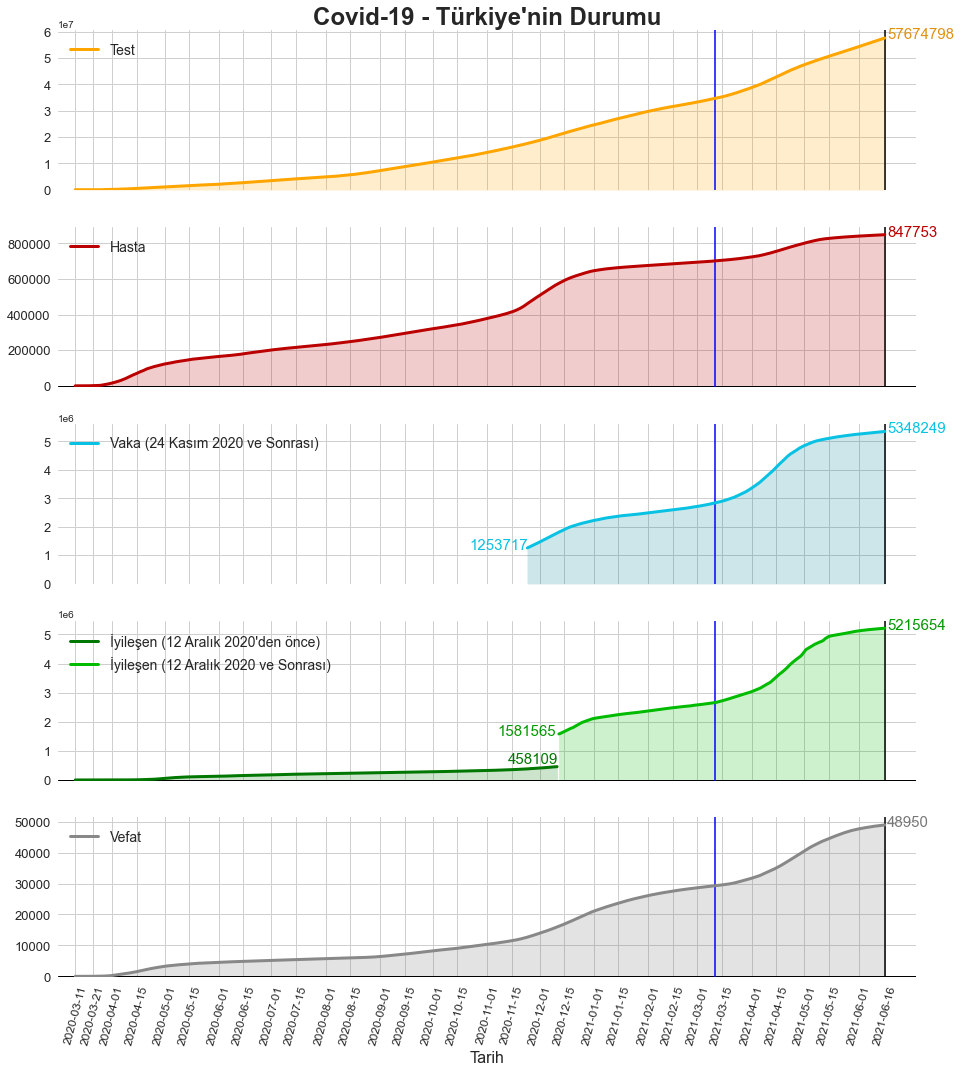

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(13.5,15), facecolor='white')
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#eeeeee'
toplam_test = covid19TR['Toplam Test']
toplam_hasta = covid19TR['Toplam Hasta']
toplam_vaka = covid19TR['Toplam Vaka'][258:]
toplam_iyilesen_12ara2020_once = covid19TR['Toplam İyileşen'][:276]
toplam_iyilesen_12ara2020_sonra = covid19TR['Toplam İyileşen'][276:]
toplam_vefat = covid19TR['Toplam Vefat']
toplam_gun = len(covid19TR)
gunler = [0, 10, 21, 35, 51, 65, 82, 96, 112, 126, 143, 157, 174, 188, 204, 218, 235, 249, 265, 279, 296, 310, 327, 341,
          355, 369, 386, 400, 416, 430, 447, len(covid19TR)-1]
def plot_olustur(veri, y_min):
    plt.axis([-10, len(covid19TR)+17, y_min, max(veri)*1.05])
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
    plt.axvline(365, color='b', linewidth=1.5)
    plt.yticks(fontsize=13)
    plt.grid(color='#cfcfcf')  
def veri_cizdir(veri, plot_renk, alt_renk, etiket, baslangic = 0, bitis = toplam_gun):
    plt.plot(range(baslangic, bitis), veri, linewidth=3, color=plot_renk, label=etiket)
    plt.fill_between(range(baslangic, bitis), veri, color=alt_renk, alpha=0.2)
    plt.legend(loc='upper left', fontsize=14)
def sayi_yazdir(x_pos, y_pos, sayi, renk):
    plt.text(x_pos, y_pos, sayi, color=renk, fontsize=15)
plt.subplot(5, 1, 1)
plot_olustur(toplam_test, -250000)
veri_cizdir(toplam_test, 'orange', 'orange', 'Test')
sayi_yazdir(toplam_gun+0.25, toplam_test[-1]-20000, toplam_test[-1], '#e09112')
plt.title('Covid-19 - Türkiye\'nin Durumu', fontsize=24, fontweight='bold')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 2)
plot_olustur(toplam_hasta, -7000)
veri_cizdir(toplam_hasta, '#bb0000', '#bb0000', 'Hasta')
sayi_yazdir(toplam_gun+0.25, toplam_hasta[-1]-8000, toplam_hasta[-1], '#bb0000')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 3)
plot_olustur(toplam_vaka, -7000)
veri_cizdir(toplam_vaka, '#09c2e3', '#068399', 'Vaka (24 Kasım 2020 ve Sonrası)', 258)
sayi_yazdir(toplam_gun+0.25, toplam_vaka[-1]-8000, toplam_vaka[-1], '#09c2e3')
sayi_yazdir(225, toplam_vaka[0]-50000, toplam_vaka[0], '#09c2e3')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 4)
plot_olustur(toplam_iyilesen_12ara2020_sonra, -20000)
veri_cizdir(toplam_iyilesen_12ara2020_once, '#007700', '#007700', 'İyileşen (12 Aralık 2020\'den önce)', 0, 276)
veri_cizdir(toplam_iyilesen_12ara2020_sonra, '#00bb00', '#00bb00', 'İyileşen (12 Aralık 2020 ve Sonrası)', 276)
sayi_yazdir(247, toplam_iyilesen_12ara2020_once[-1]+135000, toplam_iyilesen_12ara2020_once[-1], '#007700')
sayi_yazdir(toplam_gun+0.25, toplam_iyilesen_12ara2020_sonra[-1]-50000, toplam_iyilesen_12ara2020_sonra[-1], '#009900')
sayi_yazdir(241, toplam_iyilesen_12ara2020_sonra[0]-45000, toplam_iyilesen_12ara2020_sonra[0], '#009900')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 5)
plot_olustur(toplam_vefat, -300)
veri_cizdir(toplam_vefat, '#888888', '#777777', 'Vefat')
sayi_yazdir(toplam_gun+0.25, toplam_vefat[-1]-300, toplam_vefat[-1], '#777777')
plt.xlabel('Tarih', fontsize=16)
plt.xticks(gunler, covid19TR.index[gunler], fontsize=12, rotation=75)
plt.tight_layout()
plt.show()

_Yukarıdaki grafiklerde bulunan koyu mavi dik çizgiler, 11 Mart 2021 tarihini yani ilk vakanın üzerinden geçen bir yılı işaret etmektedir._

**Türkiye'nin bir yıldan fazla süredir sürdürdüğü Koronavirüs ile mücadelesinde yukarıdaki grafiklere bakıldığında;**

Toplam test sayısının en baştan itibaren eğimin **üstel** gibi bir hal aldığı ve **Mart 2021**'in ikinci yarısından sonra bu eğimin **daha da** artması ve sonrasında **sabit şekilde** yükselişini sürdürerek **58 milyona doğru yaklaştığı** söylenebilir.

Hasta artışlarının yüksek olduğu zaman aralığı **Nisan 2020'nin başları ile sonları arasında**, takip eden aylarda ise neredeyse sabit bir şekilde artmıştır. **Kasım 2020'nin ikinci yarısından sonra** yeniden hasta artış hızı yükselmiş ve sonrasında **gitgide yatay seyir şeklinde** yavaşlayarak **Mart 2021'in ikinci yarısına kadar** neredeyse sabit şekilde ilerlemiştir. Bundan sonrasında ise **yeniden artışın** olduğu ama **tam kapanma** döneminden sonra tekrar **yatay seyirde** devam ettiği söylenebilir. (Toplam hasta sayısının nasıl edildiği hakkında bilgi için yukarıdaki **NOT 3**'e bakınız)

Vaka sayıları (**NOT 5**'e bakınız) **Aralık 2020'nin ikinci yarısına** kadar sabit bir şekilde artmış, sonrasında **giderek yavaşlamıştır**. **Mart 2021'in ikinci yarısından sonra** eğimin yeniden büyük ölçüde yükseldiği ama **tam kapanmanın** sonrasında son bir ay içinde artışın **önemli ölçüde** azaldığı ve **5.4 milyona yaklaştığı** söylenebilir.

İyileşen hızı, **Nisan 2020'nin sonları ile Mayıs 2020'nin ikinci yarısına** kadarki günlerde yüksek düzeyde seyretmiştir. 12 Aralık 2020 tarihine kadar bu sayı **500 bin**'e yaklaşmıştır. Bu tarihten sonra **izolasyon süresi dolan vakalar**ın da dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız) sayıda bir anda sıçrama yaşanmıştır (1 milyonun üzerinde) ve grafiğe göre **2020'nin sonlarına doğru sabit** şekilde yükselmiş, sonrasında yavaşlamış, devamında **Mart 2021'in yarısına kadar aynı seyirde** devam etmiş ve **Mayıs 2021'in ikinci yarısına kadar** artış yaşanıp, son bir ay içinde eğimin **daha yatay** seviyede sürmesiyle sayının **5.2 milyonu geçtiği** dile getirilebilir.

Vefat sayısındaki eğim için başlarda **Nisan 2020 içinde** yüksek seyretmiş, **Mayıs 2020'den sonra** yavaşlamış, ama **Eylül 2020'den itibaren** yine giderek yükselmiştir ve bu eğim **Kasım 2020'nin ikinci yarısından sonra** artmaya devam etmiştir! **2021'in başından itibaren giderek yavaşlasa** da özellikle **Mart 2021'in ikinci yarısından sonra** yeniden yükselişe geçmiştir. **Tam kapanmadan** sonra özellikle son iki haftada **yeniden yatay seyire yaklaştığı** ve **49 bine** yakın olduğu belirtilebilir.

### **Son 20 Güne Dair Hasta Sayısı Grafiği**

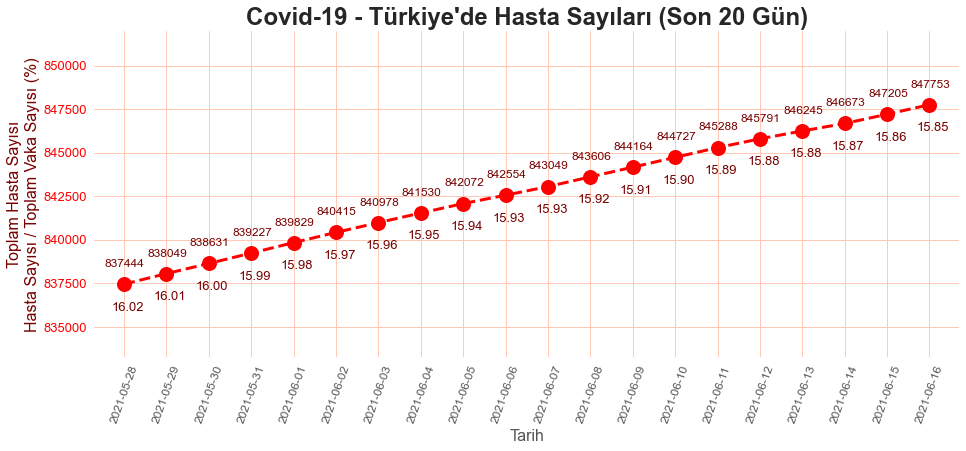

In [6]:
plt.figure(figsize=(15.5,6), facecolor='white')
toplam_hasta_son20 = covid19TR['Toplam Hasta'][-20:]
plt.plot(covid19TR.index[-20:], toplam_hasta_son20, marker='o', markersize=15, linewidth=3, linestyle='--', color='r')
plt.axis([-0.7,19.7,min(toplam_hasta_son20)*0.995,max(toplam_hasta_son20)*1.005])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.55), covid19TR.iloc[i,0]+1000, covid19TR.iloc[i,0], fontsize=12, color='#770000')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,0]-1500, "{:.2f}".format(covid19TR.iloc[i,0]/covid19TR.iloc[i,9]*100),
             fontsize=13, color='#770000')
plt.title('Covid-19 - Türkiye\'de Hasta Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Hasta Sayısı\nHasta Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Toplam hasta sayısı grafikte görüldüğü üzere **847 bini** geçmiştir! Bu sayının toplam vaka sayısına oranı da 28 Mayıs 2021'de **%16.02** olduğu görülürken, 16 Haziran 2021'de **%15.85**'e kadar gerilemiştir.

### Son 20 Güne Dair Vaka Sayısı Grafiği

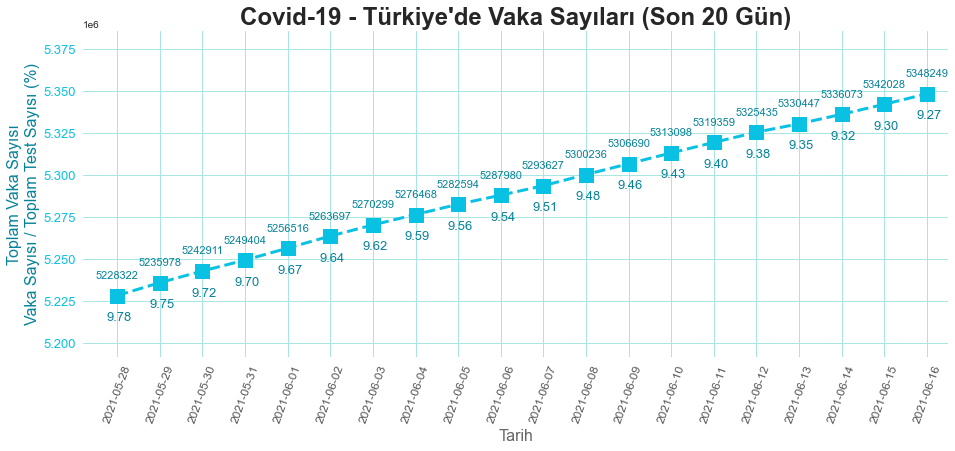

In [7]:
plt.figure(figsize=(15.5,6))
toplam_vaka_son20 = covid19TR['Toplam Vaka'][-20:]
plt.axis([-0.8,19.5,min(toplam_vaka_son20)*0.993,max(toplam_vaka_son20)*1.007])
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Vaka'][-20:], marker='s', markersize=15, linewidth=3, 
         linestyle='--', color='#09c2e3')
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-len(covid19TR)+19.5, covid19TR.iloc[i,9]+10000, covid19TR.iloc[i,9], color='#068399', fontsize=11)
    plt.text(i-len(covid19TR)+19.75, covid19TR.iloc[i,9]-15000, "{:.2f}".format(covid19TR.iloc[i,9]/covid19TR.iloc[i,3]*100), 
             color="#068399", fontsize=13)
plt.title('Covid-19 - Türkiye\'de Vaka Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.ylabel('Toplam Vaka Sayısı\nVaka Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#068399')
plt.yticks(fontsize=13, color='#09c2e3')
plt.grid(color='#a8e6e4')
plt.show()

**10 Aralık 2020**'den itibaren paylaşılmaya başlanan ve mevcut _Günlük Vaka_ sayıları ile geriye dönük hesaplamaları da dahil olunan (yukarıdaki **NOT 5**'e bakınız) _Toplam Vaka Sayılarına_ dair grafiğe göre en son 16 Haziran 2021'de **5 milyon 348 bin 249**'a yükselmiştir. 

Bu sayının toplam test sayısına oranı, grafikte görüldüğü gibi gitgide azalarak son ölçümde **%9.27** olduğu görülmüştür.

### **Son 20 Güne Dair Vefat Sayısı Grafiği**

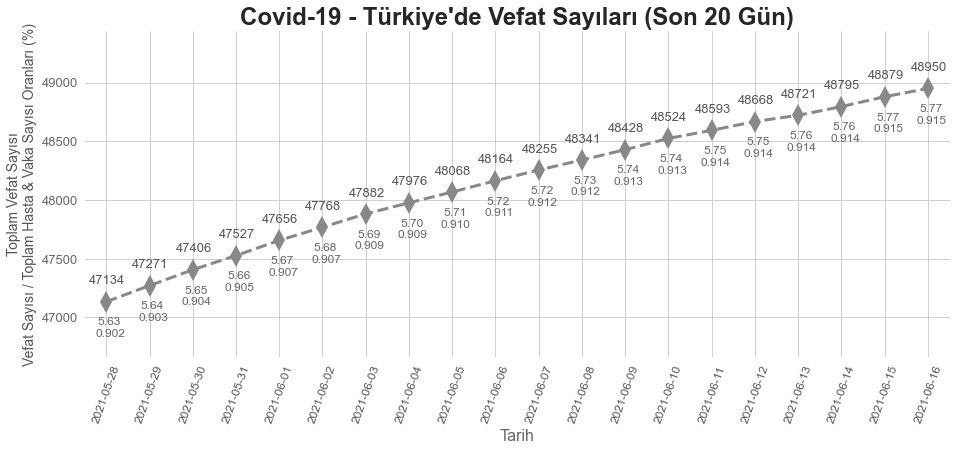

In [8]:
plt.figure(figsize=(15.5,6))
toplam_vefat_son20 = covid19TR['Toplam Vefat'][-20:]
plt.plot(covid19TR.index[-20:], toplam_vefat_son20, marker='d', markersize=15, linewidth=3, linestyle='--', color='#888888')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_vefat_son20)*0.99,max(toplam_vefat_son20)*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,1]+150, covid19TR.iloc[i,1], fontsize=13, color='#555555')
    plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,1]-200, 
             "{:.2f}".format(covid19TR.iloc[i,1]/covid19TR.iloc[i,0]*100), fontsize=12, color='#666666')
    plt.text(i-(len(covid19TR)-19.74), covid19TR.iloc[i,1]-300, 
             "{:.3f}".format(covid19TR.iloc[i,1]/covid19TR.iloc[i,9]*100), fontsize=12, color='#666666')
plt.title('Covid-19 - Türkiye\'de Vefat Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Toplam Hasta & Vaka Sayısı Oranları (%)', fontsize=14, color='#555555')
plt.grid(color='#d0d0d0')
plt.show()

Toplam vefat sayısı son verilere göre **49 bin**'e doğru yaklaşmaktadır! Toplam hasta sayısına oran, 28 Mayıs 2021 tarihinde **%5.63**'de iken ne yazık ki yükselmeye devam ederek 16 Haziran 2021'de **%5.77**'ye kadar ulaşmıştır!

Toplam vaka sayısına göre oranda ise en son **%0.915**'lik oranla karşılaşmaktayız.

### **Son 20 Güne Dair İyileşen Sayısı Grafiği**

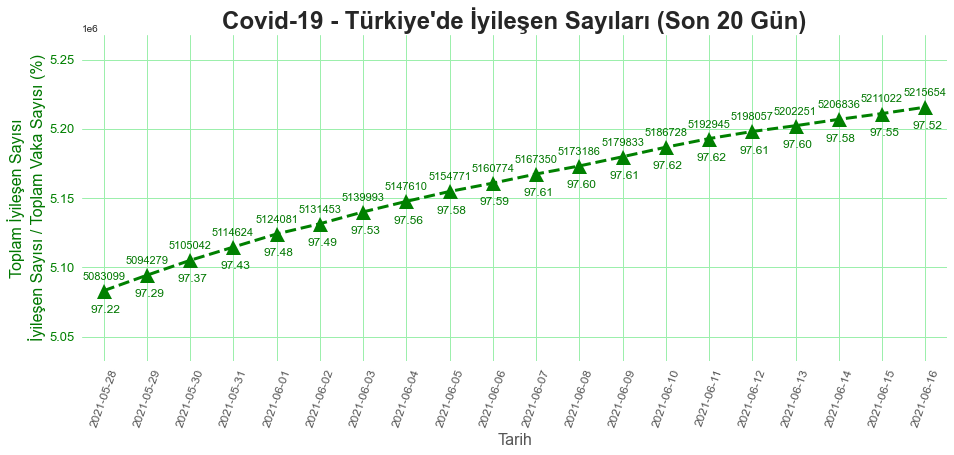

In [9]:
plt.figure(figsize=(15.5,6))
toplam_iyilesen_son20 = covid19TR['Toplam İyileşen'][-20:]
plt.plot(covid19TR.index[-20:], toplam_iyilesen_son20, marker='^', markersize=15, linewidth=3, linestyle='--', color='g')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_iyilesen_son20)*0.99,max(toplam_iyilesen_son20)*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,2]+8000, covid19TR.iloc[i,2], fontsize=11, color='#007700')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,2]-16000, 
             "{:.2f}".format(covid19TR.iloc[i,2]/covid19TR.iloc[i,9]*100), fontsize=12, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#007700')
plt.grid(color='#9cefac')
plt.show()

İyileşen sayısı 22 Mayıs 2021'den sonra **5 milyon 200 bin**'i geçmiştir! Bu sayının toplam vaka sayısına oran, **izolasyon süresi dolan vakaların** dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız); 10 Haziran 2021 tarihine kadar **artma** eğiliminde olup sonrasında **azalışa** geçerek en son **%97.52** oranına rastlamaktayız!

### **Son 120 Güne Dair Günlük Hasta, Vaka, Vefat, İyileşen & Test Artışları İstatistikleri ve Dağılımları**

In [10]:
# Son 120 Gün - Hasta Artış, Vefat Artış ve Test Artış
round(covid19TR[['Hasta Artış', 'Vefat Artış', 'Test Artış', 'İyileşen Artış', 'Günlük Vaka']][-120:].describe(), 2)

,Hasta Artış,Vefat Artış,Test Artış,İyileşen Artış,Günlük Vaka
count,120.00,120.00,120.00,120.00,120.00
mean,1357.34,177.48,216048.61,22716.92,22885.22
std,865.77,101.83,58068.39,18251.03,17903.13
min,428.00,53.00,101105.00,4186.00,5012.00
25%,654.25,79.50,187007.25,7887.25,8629.25
50%,918.00,154.50,220573.50,17162.50,14271.50
75%,2204.75,261.75,245674.50,35473.75,37305.25
max,3128.00,394.00,322128.00,81302.00,63082.00


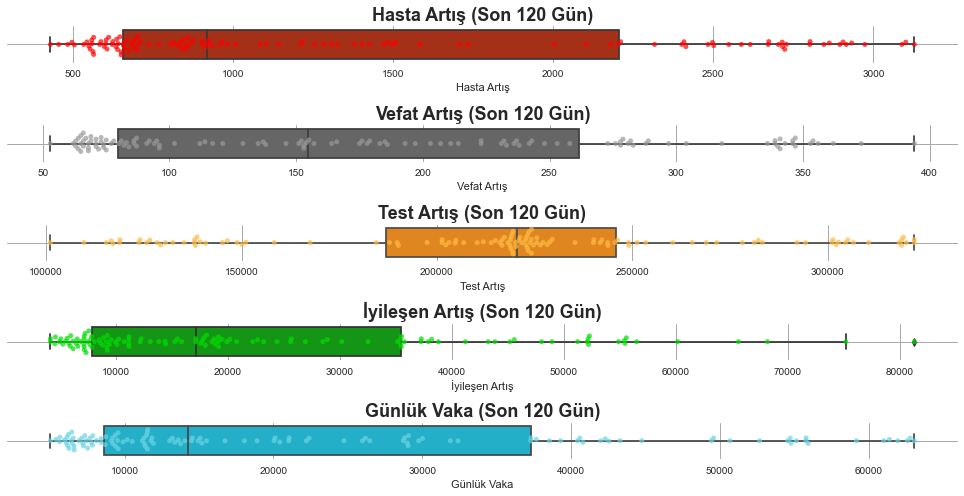

In [11]:
plt.figure(figsize=(13.5,7))
plt.subplot(5,1,1)
sns.boxplot(x='Hasta Artış', data=covid19TR[-120:], color='#bb2200')
sns.swarmplot(x='Hasta Artış', data=covid19TR[-120:], color='#ff0000', alpha=0.7)
plt.title('Hasta Artış (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,2)
sns.boxplot(x='Vefat Artış', data=covid19TR[-120:], color='#666666')
sns.swarmplot(x='Vefat Artış', data=covid19TR[-120:], color='#999999', alpha=0.7)
plt.title('Vefat Artış (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,3)
sns.boxplot(x='Test Artış', data=covid19TR[-120:], color='#ff8800')
sns.swarmplot(x='Test Artış', data=covid19TR[-120:], color='#ffba42', alpha=0.7)
plt.title('Test Artış (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,4)
sns.boxplot(x='İyileşen Artış', data=covid19TR[-120:], color='#00aa00')
sns.swarmplot(x='İyileşen Artış', data=covid19TR[-120:], color='#00dd00', alpha=0.7)
plt.title('İyileşen Artış (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,5)
sns.boxplot(x='Günlük Vaka', data=covid19TR[-120:], color='#09c2e3')
sns.swarmplot(x='Günlük Vaka', data=covid19TR[-120:], color='#68d3e3', alpha=0.7)
plt.title('Günlük Vaka (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.tight_layout()
plt.show()

### Tüm Günler - Hasta, Vaka, Vefat & İyileşen Artış Sayıları + Sonraki Günlere Ait Tahminler

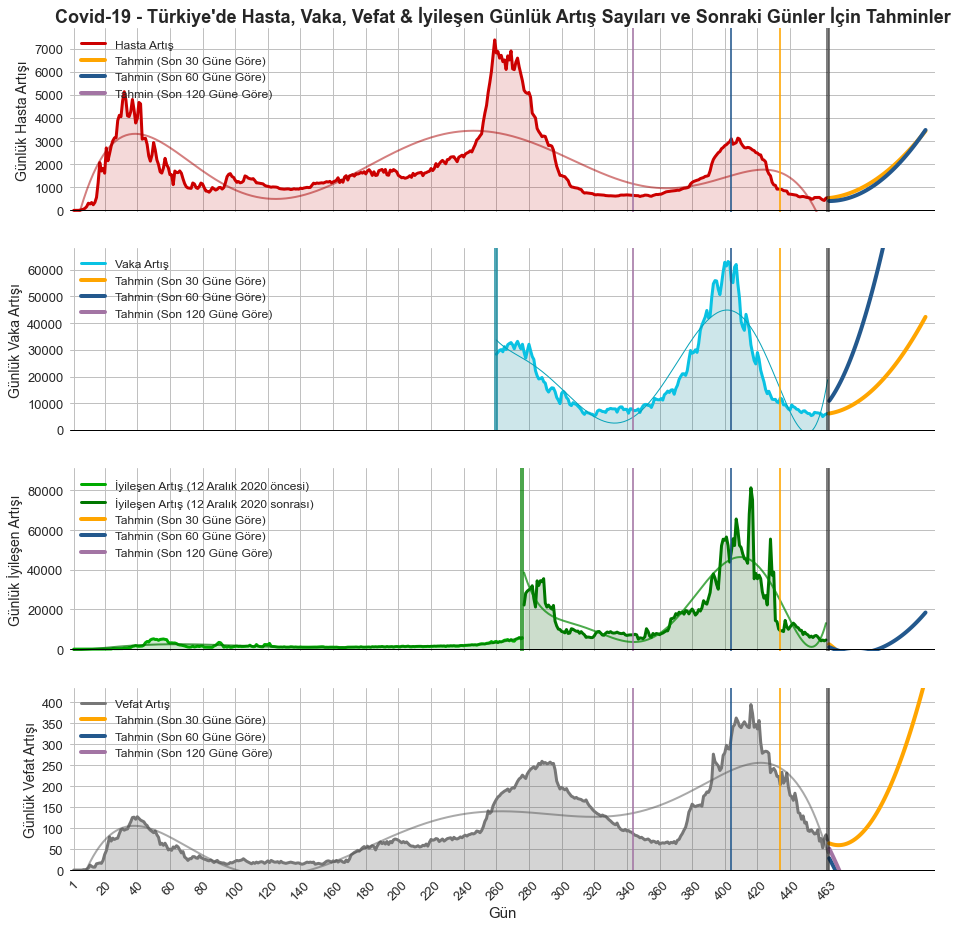

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
hasta_artis = covid19TR['Hasta Artış']
vefat_artis = covid19TR['Vefat Artış']
vaka_artis = covid19TR['Günlük Vaka'][259:]
iyilesen_artis_12ara2020_once = covid19TR['İyileşen Artış'][:276]
iyilesen_artis_12ara2020_sonra = covid19TR['İyileşen Artış'][277:]
gun_cizgiler = np.array([0, 19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319, 339, 359, 379, 399,
                         419, 439, len(covid19TR)-1])
gun_araliklar = [30, 60, 120]
renk=['orange', '#23588d', '#a375a4']
y_ileri_tahminler = []
polynomial = PolynomialFeatures(degree=2)
linear = LinearRegression()
for s in range(1,5):
    y_ileri_tahmin = []
    for g in gun_araliklar:
        if s == 1:     y = hasta_artis.values[-g:].reshape(-1,1)
        elif s == 2:   y = vaka_artis.fillna(0).values[-g:].reshape(-1,1)
        elif s == 3:   y = iyilesen_artis_12ara2020_sonra.values[-g:].reshape(-1,1)
        elif s == 4:   y = vefat_artis.values[-g:].reshape(-1,1)
        x = np.array(list(range(len(y)))).reshape(-1,1)
        x_test = np.array(list(range(len(y), len(y)+60))).reshape(-1,1)
        x_poly = polynomial.fit_transform(x)
        x_test_poly = polynomial.fit_transform(x_test)
        linear.fit(x_poly, y)
        y_ileri_tahmin.append(linear.predict(x_test_poly))
    y_ileri_tahminler.append(y_ileri_tahmin)
y_mevcut_tahminler = []
polynomial = PolynomialFeatures(degree=6)
for s in range(1,6): 
    if s == 1:    y = hasta_artis.fillna(0).values.reshape(-1,1)
    elif s == 2:  y = vaka_artis.fillna(0).values.reshape(-1,1)
    elif s == 3:  y = iyilesen_artis_12ara2020_once.fillna(0).values.reshape(-1,1)
    elif s == 4:  y = iyilesen_artis_12ara2020_sonra.fillna(0).values.reshape(-1,1)
    elif s == 5:  y = vefat_artis.fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    y_mevcut_tahminler.append(linear.predict(x_poly))
def plot_cizdir(veri, y_alt, y_ust, y_etiket, x_tick, x_tick_metin):
    plt.axis([-2, len(covid19TR)+65, y_alt, veri.max()+y_ust])
    plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.5)
    plt.axhline(0, color='k', linewidth=1)
    plt.yticks(fontsize=13)
    plt.ylabel(y_etiket, fontsize=14)
    plt.xticks(x_tick, x_tick_metin, fontsize=13, rotation=45)
    plt.grid(color='#c0c0c0')
    plt.legend(loc='upper left', fontsize=12)  
def veri_cizdir(veri, baslangic, bitis, renk, kalinlik=1, alpha=1, etiket=None):
    plt.plot(range(baslangic, bitis), veri, color=renk, linewidth=kalinlik, alpha=alpha, label=etiket) 
def tahmin_cizdir(veri, gunler, renk, etiket, kalinlik=1):
    plt.plot(gunler, veri, color=renk, label=etiket, linewidth=kalinlik)
def alan_doldur(veri, baslangic, bitis, renk, alpha):
    plt.fill_between(range(baslangic, bitis), veri, color=renk, alpha=alpha)
def cizgi_yerlestir(pozisyon, renk, alpha, kalinlik):
    plt.axvline(x=pozisyon, color=renk, alpha=alpha, linewidth=kalinlik)
plt.figure(figsize=(15.5,15.5))
plt.subplot(4,1,1)
plt.title('Covid-19 - Türkiye\'de Hasta, Vaka, Vefat & İyileşen Günlük Artış Sayıları ve Sonraki Günler İçin Tahminler', 
          fontsize=18, fontweight='bold')
veri_cizdir(hasta_artis, 0, len(covid19TR), '#cc0000', 3, 1, 'Hasta Artış')
veri_cizdir(y_mevcut_tahminler[0], 0, len(covid19TR), '#aa0000', 2, 0.5)
alan_doldur(hasta_artis, 0, len(covid19TR), '#bb0000', 0.15)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[0][i], x_test+len(covid19TR)-120, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(hasta_artis, -50, 500, 'Günlük Hasta Artışı', gun_cizgiler, 
            ['' for _ in range(len(gun_cizgiler))])
plt.subplot(4,1,2)
veri_cizdir(vaka_artis, 259, len(covid19TR), '#09c2e3', 3, 1, 'Vaka Artış')
veri_cizdir(y_mevcut_tahminler[1], 259, len(covid19TR), '#07a3b9')
alan_doldur(vaka_artis, 259, len(covid19TR), '#068399', 0.2)
cizgi_yerlestir(259, '#068399', 0.7, 4)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[1][i], x_test+len(covid19TR)-120, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(vaka_artis, -500, 5000, 'Günlük Vaka Artışı', gun_cizgiler, 
            ['' for _ in range(len(gun_cizgiler))])
plt.subplot(4,1,3)
veri_cizdir(iyilesen_artis_12ara2020_once, 0, len(iyilesen_artis_12ara2020_once), '#00aa00', 3, 1, 
            'İyileşen Artış (12 Aralık 2020 öncesi)')
veri_cizdir(y_mevcut_tahminler[2], 0, len(y_mevcut_tahminler[2]), '#007700', 2, 0.7)
veri_cizdir(iyilesen_artis_12ara2020_sonra, 276, len(iyilesen_artis_12ara2020_sonra)+276, '#007700', 3, 1,
            'İyileşen Artış (12 Aralık 2020 sonrası)')
veri_cizdir(y_mevcut_tahminler[3], 276, len(covid19TR)-1, '#008800', 2, 0.7)
alan_doldur(iyilesen_artis_12ara2020_once, 0, len(covid19TR[:276]), '#008800', 0.2)
alan_doldur(iyilesen_artis_12ara2020_sonra, 276, len(covid19TR)-1, '#005500', 0.2)
cizgi_yerlestir(275, 'g', 0.7, 4)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[2][i], x_test+len(covid19TR)-120, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(iyilesen_artis_12ara2020_sonra, -1000, 10000, 'Günlük İyileşen Artışı', gun_cizgiler, 
            ['' for _ in range(len(gun_cizgiler))])
plt.subplot(4,1,4)
veri_cizdir(vefat_artis, 0, len(covid19TR), '#777777', 3, 1, 'Vefat Artış')
veri_cizdir(y_mevcut_tahminler[4], 0, len(covid19TR), '#555555', 2, 0.5)
alan_doldur(vefat_artis, 0, len(covid19TR), '#555555', 0.25)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[3][i], x_test+len(covid19TR)-120, renk[i],
                 'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(vefat_artis, -2, 40, 'Günlük Vefat Artışı', gun_cizgiler, gun_cizgiler+1)
plt.xlabel('Gün', fontsize=15)
plt.show()

_**ÖNEMLİ:** 12 Aralık 2020 gününe ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiğe dahil edilmemiştir!_

_Makine öğrenmesi yardımıyla_ gelecekteki günler için tahminlere baktığımızda;

* _Hasta_ sayısında son 30 ve 60 güne göre **giderek artış olacağı** (son 120 günün verileri tamamen negatif tahmin yaptığından grafikte gözükmemektedir); 
* _Vaka_ sayısında mevcut gün aralıklarındaki veriler değerlendirildiğinde son 30 güne göre **giderek artışın** yaşanacağı, son 60 güne göre bu artışın **daha da hızlı** olacağı (yine son 120 günlük veriler tamamen negatif çıkmıştır);
* _İyileşen_ sayısında son 30 ve 60 güne göre **önce azalıp sonra artışın olacağı** (son 120 günün verdiği tahmin yine olarak gözükmekte),
* _Vefat_ sayısında ise son 30 güne göre **önce yatay seyirde sonra hızla yükseliş** olacağı ancak son 60 ve 120 güne göre **hızla düşerek sıfırlanacağı** söylenebilir!

### **Son 20 Gün İçindeki Hasta Sayısı Artışları**

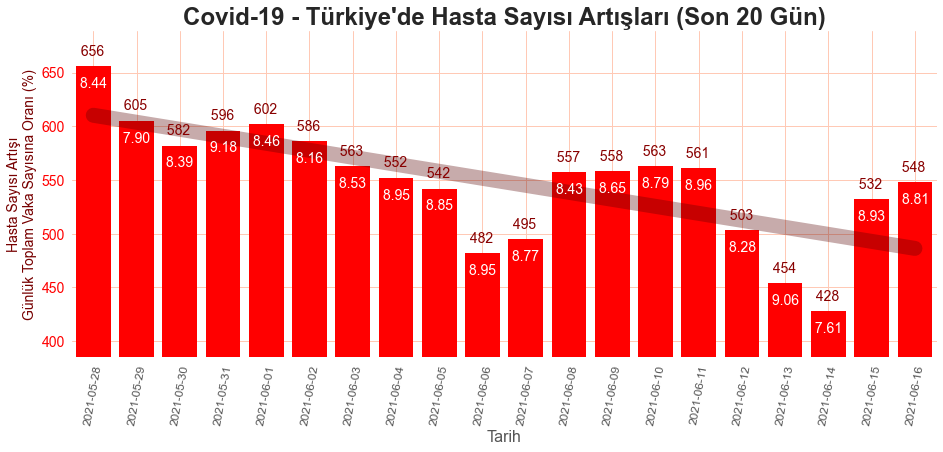

In [13]:
plt.figure(figsize=(15.5,6))
hasta_artis_son20 = covid19TR['Hasta Artış'][-20:]
slp, intcp = np.polyfit(list(range(20)), hasta_artis_son20, 1)
plt.bar(covid19TR.index[-20:], hasta_artis_son20, color='r')
plt.axis([-0.5,19.5,hasta_artis_son20.min()*0.9,hasta_artis_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,10]+10, 
             "{:4}".format(int(covid19TR.iloc[i,10])), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,10]-20, 
             "{:5.2f}".format(round(covid19TR.iloc[i,10] / covid19TR.iloc[i,8] * 100, 2)), fontsize=14, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#550000', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Artışları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Artışı\nGünlük Toplam Vaka Sayısına Oranı (%)', fontsize=14, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Son 20 günün hasta sayısı artışları incelendiğinde; artık **1000**'in altında olduğunu açıkça söyleyebiliriz!

Bu günler içinde en yüksek sayı **656 ile 28 Mayıs 2021**'de ölçülmüş ve bu eğimin giderek **aşağıya doğru** gittiği belirtilebilir ki bu sayılar genel olarak **450-560** arasında gidip gelmektedir! 

Günlük toplam vaka sayısına oranlarda ise **bir aşağı bir yukarı** değişimler görülmektedir ve her zaman **%10**'un altında kalıp genelde **%7.6-9** arasında seyrettiğini dile getirebiliriz!

### Son 20 Gün İçindeki Günlük Vaka Sayısı

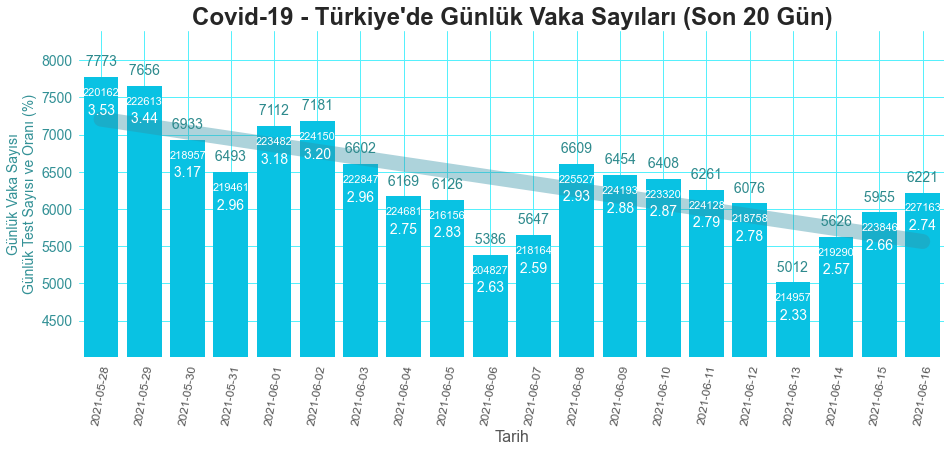

In [14]:
plt.figure(figsize=(15.5,6))
gunluk_vaka_son20 = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), gunluk_vaka_son20, 1)
plt.bar(covid19TR.index[-20:], gunluk_vaka_son20, color='#09c2e3')
plt.axis([-0.5,19.5,gunluk_vaka_son20.min()*0.8,gunluk_vaka_son20.max()*1.08])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#339196', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.55), covid19TR.iloc[i,8]+150, 
             "{:5}".format(int(covid19TR.iloc[i,8])), fontsize=14, color='#2e8a8d')
    plt.text(i-(len(covid19TR)-19.58), covid19TR.iloc[i,8]-250, int(covid19TR.iloc[i,13]), fontsize=11, color='white')
    plt.text(i-(len(covid19TR)-19.60), covid19TR.iloc[i,8]-500, 
            "{:5.2f}".format(covid19TR.iloc[i,8] / covid19TR.iloc[i,13] * 100), fontsize=14, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#3391a6', linewidth=15, alpha=0.4)
plt.title('Covid-19 - Türkiye\'de Günlük Vaka Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Günlük Vaka Sayısı\nGünlük Test Sayısı ve Oranı (%)', fontsize=14, color='#339196')
plt.grid(color='#56f0fc')
plt.show()

Son 20 günün vaka sayıları incelendiğinde, günlük hep **10 binin altında** seyrettiğini ve günden güne değişerek en düşük **5012** ve en yüksek **7773** sayıları arasında kaldığını açıkça belirtebiliriz!

Günlük test sayısına oranlarda ise en yüksek oran **%3.53** ile 28 Mayıs 2021'de ölçülmüş olup, vaka sayılarının son günlerde **aşağı yöne doğru** gitmesi ile oranlara olumlu şekilde yansımıştır ki 3 Haziran 2021'den sonra artık **%3**'ün üzerinde olmadığını söylememiz mümkündür!

### **Son 20 Gün İçindeki Vefat Sayısı Artışları**

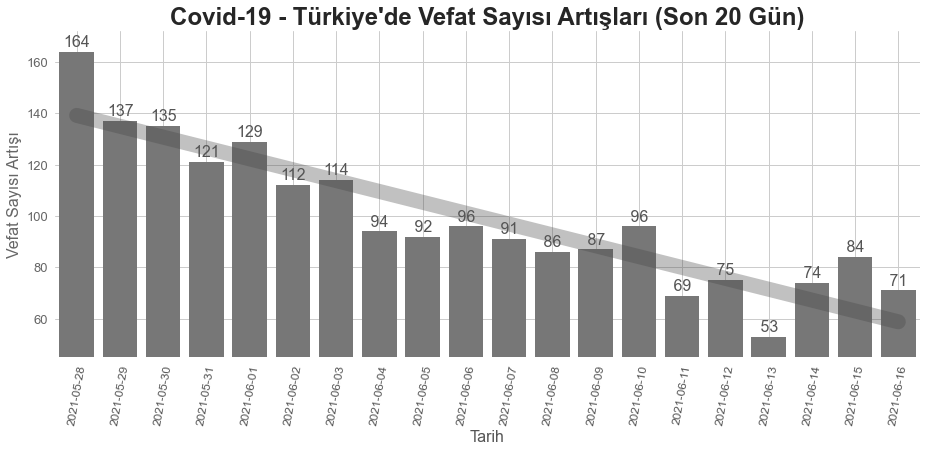

In [15]:
plt.figure(figsize=(15.5,6))
vefat_artis_son20 = covid19TR['Vefat Artış'][-20:]
slp, intcp = np.polyfit(list(range(20)), vefat_artis_son20, 1)
plt.bar(covid19TR.index[-20:], vefat_artis_son20, color='#777777')
plt.axis([-0.5,19.5,vefat_artis_son20.min()*0.85,vefat_artis_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,11]+2, 
             "{:3}".format(int(covid19TR.iloc[i,11])), fontsize=16, color='#555555')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#444444', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Artışları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Artışı', fontsize=16, color='#666666')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vefat sayılarına bakıldığında, 28 Mayıs 2021'de **164** olduğu görülürken, **gitgide azalmalar** devam etmektedir ki 4 Haziran 2021'den itibaren **100**'ün altında kaldığını belirtmemiz söz konusudur!

Görüldüğü üzere bu günler içinde en düşük sayı 13 Haziran 2021'de **53** olarak açıklanmıştır.

### **Son 2 Hafta İçindeki İyileşen Sayısı Artışları**

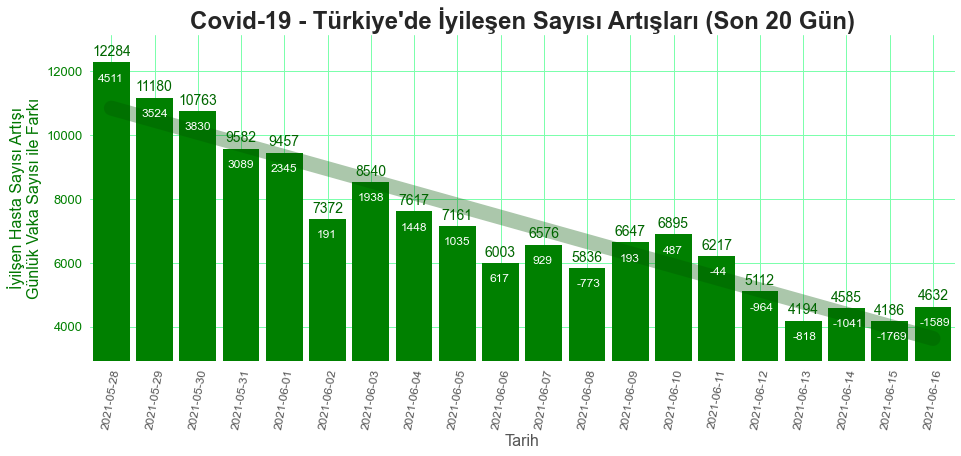

In [16]:
plt.figure(figsize=(15.5,6))
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), iyilesen_artis, 1)
plt.bar(index, iyilesen_artis, color='g', width=0.85)
plt.axis([-0.5,19.5,iyilesen_artis.min()*0.7,iyilesen_artis.max()*1.07])
plt.xticks(index, rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(iyilesen_artis)):
    if iyilesen_artis[i] >= 10000:    sh = 0.44
    else:    sh = 0.36
    plt.text(i-sh, iyilesen_artis[i]+200, int(iyilesen_artis[i]), fontsize=14, color='#006600')
    if abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 10000:    sh = 0.4
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 1000:   sh = 0.31
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 100:    sh = 0.25
    else:    sh = 0.17
    plt.text(i-sh, iyilesen_artis[i]-600, int(iyilesen_artis[i] - gunluk_vaka[i]), fontsize=12, color='white')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#005500', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de İyileşen Sayısı Artışları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyilşen Hasta Sayısı Artışı\nGünlük Vaka Sayısı ile Farkı', fontsize=16, color='#007700')
plt.grid(color='#7cffac')
plt.show()

Günlük iyileşen hasta sayısı, 12 Aralık 2020'de **izolasyon süresi dolan vakaların** da dahil edilmesi ile birlikte (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içinde en yüksek sayı **12284** ile **28 Mayıs 2021**'de görülmüştür. Bu tarihten sonra vaka sayısının azalmasına paralel olarak burada da **azalmalar** görülmektedir ki özellikle son dört gün **5000**'in altında kalmıştır.

Bunun yanında, günlük vaka sayısına en yüksek farklarda, **artı (+) yönde 4511** ile **28 Mayıs 2021**'de, **eksi(-) yönde 1769** ile **15 Haziran 2021**'de ölçülmüştür.

### **Son 20 Gün İçindeki Günlük İyileşen Sayısının Vaka Sayısına Oranı**

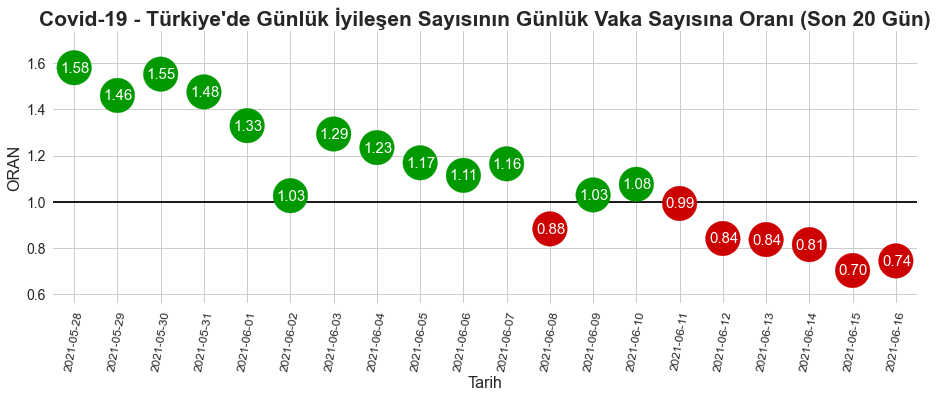

In [17]:
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
oranlar = iyilesen_artis / gunluk_vaka
colors = []
for i in range(20):
    if oranlar[i] < 1.0:    colors.append('#cc0000')
    else:    colors.append('#009900')
plt.figure(figsize=(15.5,5))
plt.axis([-0.5, 19.5, min(oranlar)*0.8, max(oranlar)*1.1])
plt.axhline(1.0, color='black', zorder=1)
plt.scatter(index, oranlar, marker="o", s=1200, color=colors, zorder=2)
for i in range(20):
    plt.text(i-0.32, oranlar[i]-0.02, "{:.2f}".format(round(oranlar[i], 2)), color='white', fontsize=15)
plt.title("Covid-19 - Türkiye\'de Günlük İyileşen Sayısının Günlük Vaka Sayısına Oranı (Son 20 Gün)", 
          fontsize=21, fontweight='bold')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('ORAN', fontsize=16)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cccccc', zorder=0)
plt.show()

12 Aralık 2020'den sonra **izolasyon süresi dolan vakaların** da dahil edilmesinden sonra (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içindeki günlük iyileşen sayısının günlük vaka sayısına oranlar 7 Haziran 2021'e kadar hep **1**'in üstünde kalmış ancak bundan sonrasında ibre **kırmızı**ya dönerek ilk olarak 8 Haziran 2021'de **0.88** ve 11 Haziran 2021'den sonra **0.7-0.99** arasında değişen oranlara rastlanılmıştır!

### **Tüm Günler Hasta/Vefat/İyileşen/Günlük Vaka Sayılarının Birbirleriyle İlişkileri ve Katsayıları**

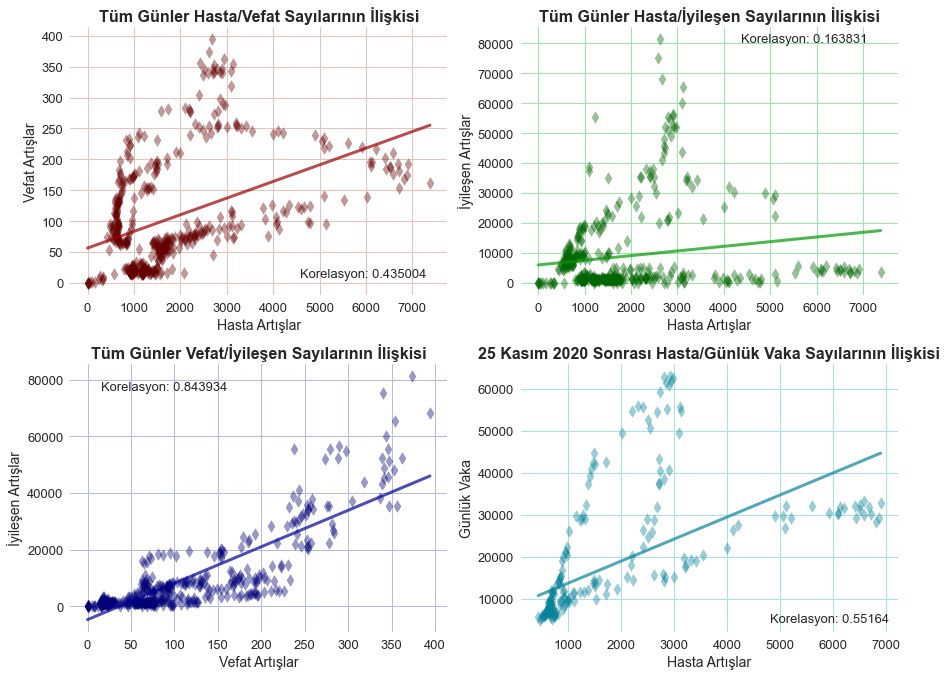

In [18]:
hasta_artis = covid19TR['Hasta Artış'][1:]
vefat_artis = covid19TR['Vefat Artış'][1:]
hasta_artis_12ara2020_haric = np.concatenate((covid19TR['Hasta Artış'][1:276].values,covid19TR['Hasta Artış'][277:].values))
iyilesen_artis_12ara2020_haric = np.concatenate((covid19TR['İyileşen Artış'][1:276].values,
                                                 covid19TR['İyileşen Artış'][277:].values))
slp1, intcp1 = np.polyfit(hasta_artis,vefat_artis,1)
x1 = [0, hasta_artis.max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(13.5,9.5))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, alpha=0.7, linewidth=3, color='#990000')
plt.scatter(hasta_artis, vefat_artis, marker='d', s=70, color='#660000', alpha=0.4)
plt.text(hasta_artis.max()-2800, 10,
         "Korelasyon: " + str(round(np.corrcoef(hasta_artis,vefat_artis)[0,1], 6)),
         fontsize=13)
plt.title('Tüm Günler Hasta/Vefat Sayılarının İlişkisi', fontsize=16, fontweight='bold')
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Vefat Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#e6c2ba')
slp2, intcp2 = np.polyfit(hasta_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, 1)
x2 = [0, hasta_artis_12ara2020_haric.max()]
y2 = [intcp2+x2[0], intcp2+(slp2*x2[1])]
plt.subplot(2, 2, 2)
plt.scatter(hasta_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, marker='d', s=70, color='#006600', alpha=0.4)
plt.plot(x2, y2, alpha=0.7, linewidth=3, color='#009900')
plt.text(hasta_artis_12ara2020_haric.max()-3000, iyilesen_artis_12ara2020_haric.max()-1000,
        "Korelasyon: " + str(round(np.corrcoef(hasta_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric)[0,1], 6)), 
         fontsize=13)
plt.title('Tüm Günler Hasta/İyileşen Sayılarının İlişkisi', fontsize=16, fontweight='bold')
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#9ce6a6')
vefat_artis_12ara2020_haric = np.concatenate((covid19TR['Vefat Artış'][1:276].values,covid19TR['Vefat Artış'][277:].values))
slp3, intcp3 = np.polyfit(vefat_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, 1)
x3 = [0, vefat_artis_12ara2020_haric.max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.scatter(vefat_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, marker='d', s=70, color='#000077', alpha=0.4)
plt.plot(x3, y3, alpha=0.7, linewidth=3, color='#000099')
plt.text(vefat_artis_12ara2020_haric.min()+15, iyilesen_artis_12ara2020_haric.max()-5000,
         "Korelasyon: " + str(round(np.corrcoef(vefat_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric)[0,1], 6)), 
         fontsize=13)
plt.title('Tüm Günler Vefat/İyileşen Sayılarının İlişkisi', fontsize=16, fontweight='bold')
plt.xlabel('Vefat Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#b3bce6')
hasta_artis_25kas2020_sonra = covid19TR['Hasta Artış'][259:]
gunluk_vaka_25kas2020_sonra = covid19TR['Günlük Vaka'][259:]
slp4, intcp4 = np.polyfit(hasta_artis_25kas2020_sonra, gunluk_vaka_25kas2020_sonra, 1)
x4 = [hasta_artis_25kas2020_sonra.min(), hasta_artis_25kas2020_sonra.max()]
y4 = [intcp4, intcp4+(slp4*(x4[1]))]
plt.subplot(2, 2, 4)
plt.scatter(hasta_artis_25kas2020_sonra, gunluk_vaka_25kas2020_sonra, marker='d', s=70, color='#068399', alpha=0.4)
plt.title('25 Kasım 2020 Sonrası Hasta/Günlük Vaka Sayılarının İlişkisi', fontsize=16, fontweight='bold')
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Günlük Vaka', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(x4, y4, alpha=0.7, linewidth=3, color='#068399')
plt.text(hasta_artis_25kas2020_sonra.max()-2100, gunluk_vaka_25kas2020_sonra.min()-500,
         "Korelasyon: " + str(round(np.corrcoef(hasta_artis_25kas2020_sonra,gunluk_vaka_25kas2020_sonra)[0,1], 6)),
         fontsize=13)
plt.grid(color='#a3e3e6')
plt.tight_layout()
plt.show()

_**ÖNEMLİ:** 12 Aralık 2020'ye ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiklere dahil edilmemiştir!_

### **Son 120 Güne Dair Hasta, Vaka, Vefat & İyileşen Sayısı Değişimi İstatistikleri ve Dağılımları**

In [19]:
# Son 120 Gün - Hasta ve Vefat Sayısı Değişimleri
round(covid19TR[['Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Vaka +/-']][-120:].describe(),2)

,Hasta +/-,Vefat +/-,İyileşen +/-,Vaka +/-
count,120.00,120.00,120.00,120.00
mean,-0.92,-0.16,-21.31,-14.04
std,84.20,15.84,6486.50,2443.64
min,-368.00,-52.00,-39744.00,-8842.00
25%,-19.25,-5.00,-1201.25,-960.75
50%,4.50,-0.50,-205.50,-100.50
75%,29.00,6.25,1300.50,986.50
max,297.00,65.00,24930.00,7033.00


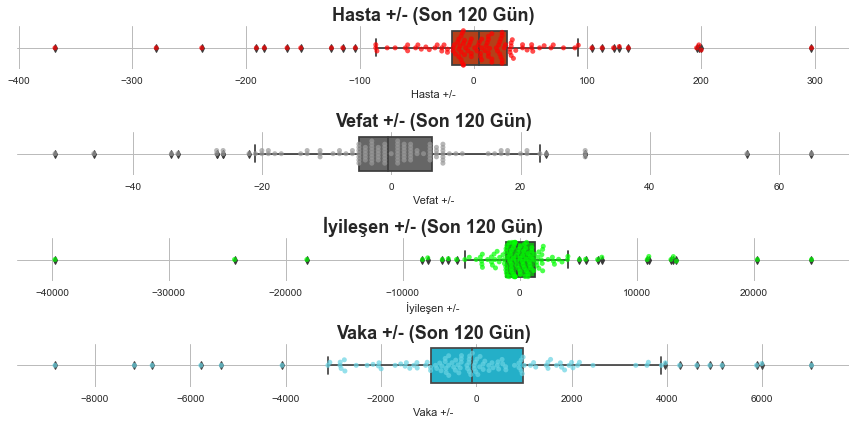

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
sns.boxplot(x='Hasta +/-', data=covid19TR[-120:], color='#cc3300')
sns.swarmplot(x='Hasta +/-', data=covid19TR[-120:], color='#ff0000', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('Hasta +/- (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.subplot(4,1,2)
sns.boxplot(x='Vefat +/-', data=covid19TR[-120:], color='#666666')
sns.swarmplot(x='Vefat +/-', data=covid19TR[-120:], color='#999999', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('Vefat +/- (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.subplot(4,1,3)
sns.boxplot(x='İyileşen +/-', data=covid19TR[-120:], color='#00bb00')
sns.swarmplot(x='İyileşen +/-', data=covid19TR[-120:], color='#00ff00', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('İyileşen +/- (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.subplot(4,1,4)
sns.boxplot(x='Vaka +/-', data=covid19TR[-120:], color='#09c2e3')
sns.swarmplot(x='Vaka +/-', data=covid19TR[-120:], color='#68d3e3', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('Vaka +/- (Son 120 Gün)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### **Son 20 Günün Hasta Sayısı Değişim Grafiği**

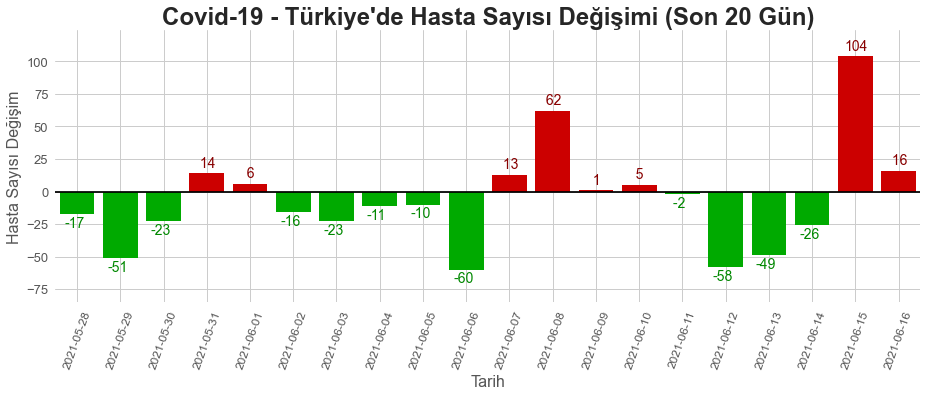

In [21]:
hasta_degisim = covid19TR['Hasta +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], hasta_degisim, color=barc)
plt.axis([-0.5,19.5,min(hasta_degisim)-25,max(hasta_degisim)+20])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,14]+5, 
                 "{:3}".format(int(covid19TR.iloc[i,14])), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,14]-10, 
                 "{:3}".format(int(covid19TR.iloc[i,14])), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Değişimi (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün hasta sayısı değişimine baktığımızda **sekiz** farklı günde artışın olduğunu grafikte görebilmekteyiz.

Yine bu grafiğe göre en çok **104** (15 Haziran 2021) artış ve en çok **60** (6 Haziran 2021) azalış gözlemlenmiştir.

### Son 20 Günün Vaka Sayısı Değişim Grafiği

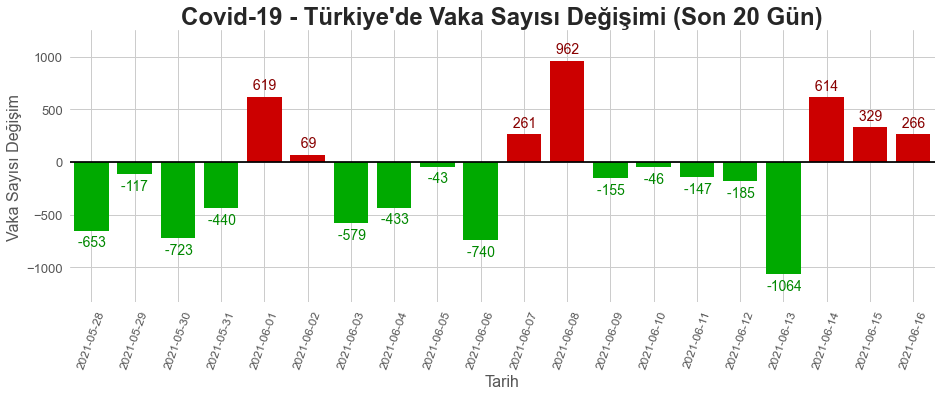

In [22]:
vaka_degisim = covid19TR['Vaka +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vaka_degisim, color=barc)
plt.axis([-0.5,19.5,min(vaka_degisim)*1.25,max(vaka_degisim)*1.3])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,17]+70, 
                 "{:4}".format(int(covid19TR.iloc[i,17])), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,17]-150, 
                 "{:5}".format(int(covid19TR.iloc[i,17])), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vaka Sayısı Değişimi (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vaka Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vaka sayısı değişimi incelendiğinde, en çok **962** artış (8 Haziran 2021), ve en çok **1064** azalış (13 Haziran 2021) meydana gelmiştir. Bu değişimlerin sadece **yedi farklı günde** artış ile sonuçlanması ve keza **çoğunlukla aşağı yönde** olması _vaka sayısının_ düşüşünü gözler önüne serse da **son üç günün** artış noktalanması da gözardı edilmemelidir!

### **Son 20 Günün Vefat Sayısı Değişim Grafiği**

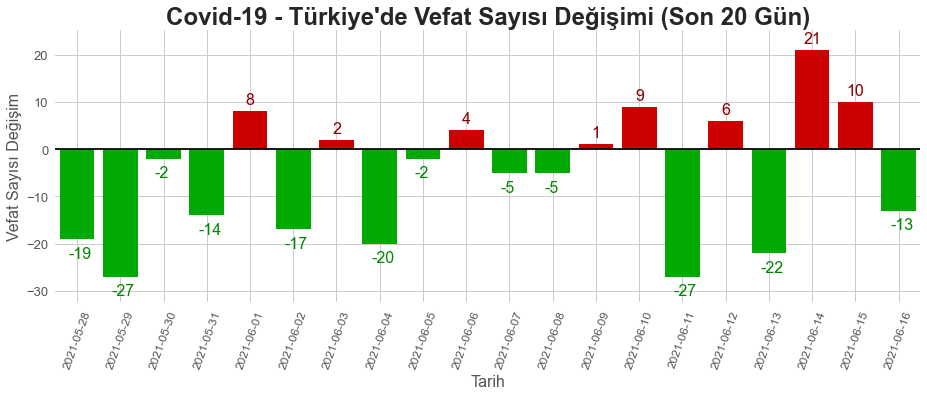

In [23]:
vefat_degisim = covid19TR['Vefat +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vefat_degisim, color=barc)
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(vefat_degisim)*1.2, max(vefat_degisim)*1.2])
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 10:    sh = 19.8;   vsh = 1.5;   c = '#880000'
    elif covid19TR.iloc[i,15] >= 0:   sh = 19.9;   vsh = 1.5;   c = '#880000'
    else:    sh = 19.8;    vsh = -4;   c = '#008800'
    plt.text(i-(len(covid19TR)-sh), covid19TR.iloc[i,15]+vsh, int(covid19TR.iloc[i,15]), fontsize=16, color=c)
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Yukarıdaki grafiğe göre vefat sayısı, son 20 gün içinde, önceki güne kıyasla en fazla **21** yükselmiş (14 Haziran 2021) ve en fazla **27** azalmıştır (29 Mayıs & 11 Haziran 2021). Yine azalışların **daha çok olduğunu** bu grafikte de görebilmekteyiz!

### **Son 20 Günün İyileşen Sayısı Değişim Grafiği**

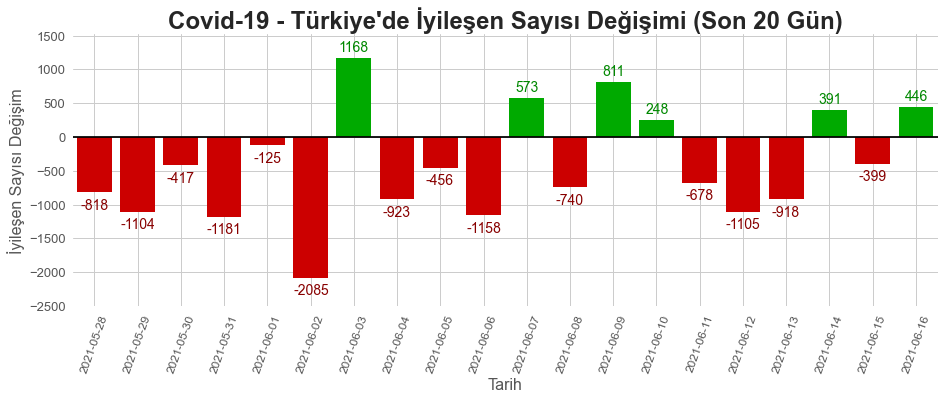

In [24]:
iyilesen_degisim = covid19TR['İyileşen +/-'][-20:]
index = covid19TR['İyileşen +/-'][-20:].index
plt.figure(figsize=(15.5,5))
barc = []
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(index, iyilesen_degisim, color=barc)
plt.xticks(index, rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(iyilesen_degisim)*1.2, max(iyilesen_degisim)*1.3])
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        if int(iyilesen_degisim[i]) >= 10000:    sh = 0.46
        elif int(iyilesen_degisim[i]) >= 1000:   sh = 0.35
        elif int(iyilesen_degisim[i]) >= 100:    sh = 0.25
        else:    sh = 0.18
        plt.text(i-sh, iyilesen_degisim[i]+100, int(iyilesen_degisim[i]), fontsize=14, color='#008800')
    else:
        if int(iyilesen_degisim[i]) <= -10000:    sh = 0.5
        elif int(iyilesen_degisim[i]) <= -1000:   sh = 0.4
        elif int(iyilesen_degisim[i]) <= -100:    sh = 0.33
        else:    sh = 0.25
        plt.text(i-sh, iyilesen_degisim[i]-250, int(iyilesen_degisim[i]), fontsize=14, color='#880000')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de İyileşen Sayısı Değişimi (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün iyileşen hasta sayısı değişiminde, en fazla artış **3 Haziran 2021**'de **1168** ile gerçekleşirken; en fazla düşüş **2085** ile **2 Haziran 2021**'de görülmüştür. 

Grafikte iyileşen sayısının **eksi (-)** yöndeki değişimin, **artı (+)** yöne göre **daha fazla** olduğu söylememiz söz konusudur.

### **Toplam Aktif Vaka Sayıları (Son 20 Gün)**

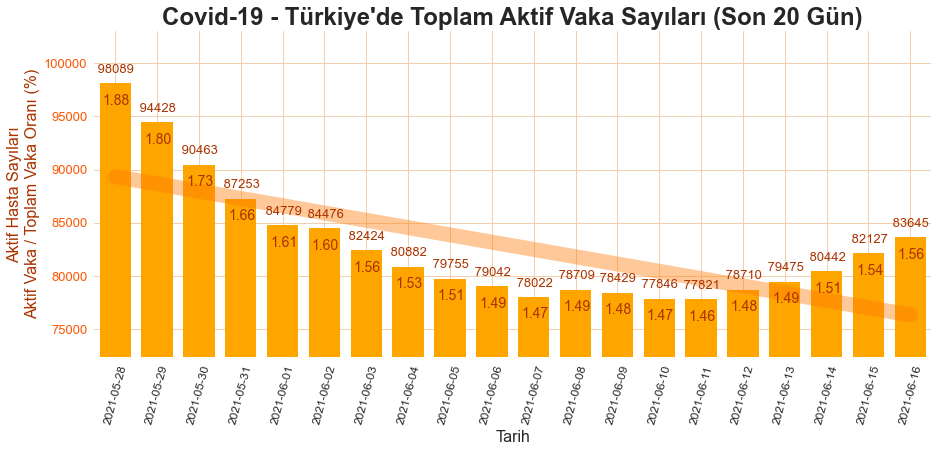

In [25]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Vaka'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
slp, intcp = np.polyfit(list(range(20)), covid19TR['Toplam Aktif Vaka'][-20:], 1)
plt.figure(figsize=(15,6))
plt.bar(covid19TR.index[-20:], covid19TR['Toplam Aktif Vaka'][-20:], color='orange', width=0.75)
plt.axis([-0.5,19.5,covid19TR['Toplam Aktif Vaka'][-20:].min()*0.93,covid19TR['Toplam Aktif Vaka'][-20:].max()*1.05])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,19]+1000, "{:6}".format(int(covid19TR.iloc[i,19])),
             fontsize=13, color='#aa3300')
    if covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100 >= 10:    sh = 19.6
    else:    sh = 19.7
    plt.text(i-(len(covid19TR)-sh), covid19TR.iloc[i,19]-2000, 
             "{:3.2f}".format(round(covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100, 2)), fontsize=14, color='#aa3300')
plt.plot([0,19],[intcp,intcp+(slp*19)], linewidth=15, alpha=0.4, color='#ff7700')
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Vaka Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Hasta Sayıları\nAktif Vaka / Toplam Vaka Oranı (%)', fontsize=16, color='#aa3300')
plt.grid(color='#f3d0ad')
plt.show()

Son 20 günün toplam aktif vaka sayılarına baktığımızda en yüksek 28 Mayıs 2021'de **98089** olduğu görülürken, bu tarihten sonra **gözle görülür düşüşler** 7 Haziran 2021 tarihine kadar devam etmiştir! 

Bu tarihten sonra **yatay seyirde** devam ederek 11 Haziran 2021'den sonra yeniden **artışa geçerek 83645**'e kadar yükselmiştir.

Toplam vaka sayısına göre oranlar ise sürekli **%2'nin altında** seyrederek **%1.46**'ya kadar düştüğünü ama en son 16 Haziran 2021'de **%1.56**'ya çıktığını belirtebiliriz.

### Son 30 Gün için Hastalarda Zatürre Oranları ve Ağır Hasta Sayıları

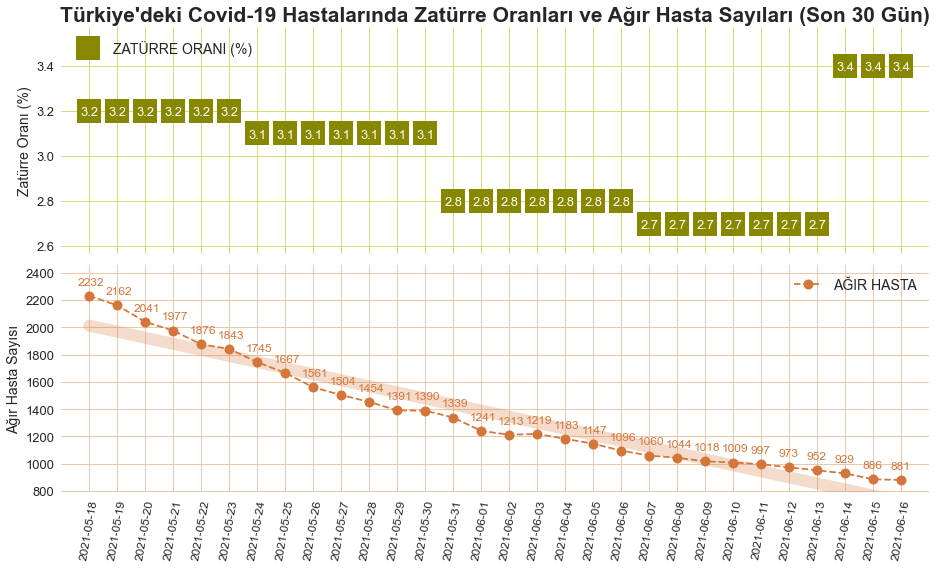

In [26]:
plt.figure(figsize=(13.8,8))
lm = len(covid19TR)-30
plt.subplot(2,1,1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,6], linestyle=' ', marker='s', markersize=24,
         label='ZATÜRRE ORANI (%)', color='#888800')
for i in range(lm, len(covid19TR)):
    plt.text(i-lm-0.3, covid19TR.iloc[i,6]-0.02, covid19TR.iloc[i,6], fontsize=13, color='white')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,6].min()*0.95, covid19TR.iloc[lm:,6].max()*1.05])
plt.title('Türkiye\'deki Covid-19 Hastalarında Zatürre Oranları ve Ağır Hasta Sayıları (Son 30 Gün)', 
          fontsize=21, fontweight='bold')
plt.ylabel('Zatürre Oranı (%)', fontsize=14)
plt.xticks(covid19TR.index[lm:], ['' for _ in range(len(covid19TR.index[lm:]))])
plt.yticks(fontsize=13)
plt.grid(color='#d1df77')
plt.legend(loc='upper left', fontsize=14)
         
plt.subplot(2,1,2)
slp, intcp = np.polyfit(list(range(30)), covid19TR['Ağır Hasta'][-30:], 1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,7], linestyle='--', marker='o', markersize=10,
         label='AĞIR HASTA', color='#d4763a')
plt.plot([0, 29],[intcp, intcp+(slp*29)], color='#d4763a', alpha=0.25, linewidth=12)
for i in range(lm,len(covid19TR)):
    plt.text(i-lm-0.4, covid19TR.iloc[i,7]+80, int(covid19TR.iloc[i,7]), fontsize=12, color='#d4763a')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,7].min()*0.9, covid19TR.iloc[lm:,7].max()*1.1])
plt.ylabel('Ağır Hasta Sayısı', fontsize=14)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#edc8a8')
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()

**Son 4 hafta için hastalardaki zatürre oranları ve ağır hasta sayıları için;**

_Hastalarda Zatürre Oranı:_ 18 Mayıs 2021'de ve ilgili haftada **%3.2** iken sonrakilerde sırayla **%3.1**, **%2.8**, **%2.7**, ve **%3.4** oranları açıklanmıştır.

**Not:** Bu oranların _haftalık_ bazda verildiği ve ilgili günlerde dolayısıyla aynı olarak kaldığı dikkate alınmalıdır.

_Ağir Hasta Sayısı:_ 18 Mayıs 2021'de **2232** olduğu görülürken ilerleyen günlerde **sürekli azalma** ile birlikte 11 Haziran 2021'de **1000**'in altına inilmiştir ve en son 16 Haziran 2021'de **881**'e kadar gerilemiştir.

### Hasta, Vefat, İyileşen, Test ve Vaka Artışlarının Aylık Toplamları

In [27]:
analiz_sutunlar = ['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış', 'Günlük Vaka',
                   'Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Test +/-', 'Vaka +/-']
covid19TR = covid19TR.reset_index()
covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR_aylik_toplam = covid19TR.resample('M', on='Tarih')[analiz_sutunlar[:5]].sum()
covid19TR_aylik_toplam.columns = ['Toplam Hasta', 'Toplam Vefat', 'Toplam İyileşen', 'Toplam Test', 'Toplam Vaka']
covid19TR_aylik_toplam

,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Toplam Test,Toplam Vaka
Tarih,,,,,
2020-03-31,13530,214,243,92403,0
2020-04-30,106673,2960,48643,941214,0
2020-05-31,43738,1366,79087,1005577,0
2020-06-30,35964,591,45138,1342456,0
2020-07-31,30967,560,41424,1419173,0
2020-08-31,39260,679,30391,2337669,0
2020-09-30,48530,1825,34823,3241769,0
2020-10-31,56704,2057,44222,3621553,0
2020-11-30,125498,3494,80756,4590478,177931


### Aynı Sütunların ve Değişimlerinin Aylık Ortalamaları

In [28]:
covid19TR_aylik_ortalama = covid19TR.resample('M', on='Tarih')[analiz_sutunlar].mean().fillna(0)
round(covid19TR_aylik_ortalama, 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Günlük Vaka,Hasta +/-,Vefat +/-,İyileşen +/-,Test +/-,Vaka +/-
Tarih,,,,,,,,,,
2020-03-31,644.29,10.19,11.57,4400.14,0.00,128.76,2.19,3.86,734.38,0.00
2020-04-30,3555.77,98.67,1621.43,31373.80,0.00,-2.97,1.57,159.43,886.07,0.00
2020-05-31,1410.90,44.06,2551.19,32437.97,0.00,-57.29,-2.19,-125.00,-206.58,0.00
2020-06-30,1198.80,19.70,1504.60,44748.53,0.00,15.13,-0.30,10.43,496.40,0.00
2020-07-31,998.94,18.06,1336.26,45779.77,0.00,-10.03,0.03,-9.87,-129.03,0.00
2020-08-31,1266.45,21.90,980.35,75408.68,0.00,19.52,0.87,2.94,2051.94,0.00
2020-09-30,1617.67,60.83,1160.77,108058.97,0.00,-6.53,0.70,5.27,66.53,0.00
2020-10-31,1829.16,66.35,1426.52,116824.29,0.00,26.52,0.32,8.42,387.45,0.00
2020-11-30,4183.27,116.47,2691.87,153015.93,5931.03,143.37,3.77,99.30,1751.57,1040.63


## SONUÇ

**Yukarıdaki analizlerde tüm bu rakamlar ve görseller şunu gösteriyor ki Türkiye'de 15 aydır süren Koronavirüs riskinin GİDEREK DÜŞÜŞE geçtiği ve bu şekilde gitmesi halinde KADEMELİ NORMALLEŞMENİN devam edebileceği yani KISITLAMALARIN zamanla kaldırılabileceği söylenebilir!**

**Tabi, son günlerde AŞI SEFERBERLİĞİNİN hız kazanmasıyla yani daha fazla meslek grubunun dahil edilmesi ve yaş sınırının gitgide aşağıya doğru çekilmesiyle daha fazla vatandaşımızın AŞIYA kavuşabildiğini, dolayısıyla gelecekte bunun sayılara olumlu yönde yansıyacağını öngörebiliriz!**

**Virüsün yayılmasına engel olmak için - aşılanmış olalım ya da olmayalım - asla ve asla virüs yokmuş gibi davranmamaya, kendimizi, sevdiklerimizi ve etrafımızdaki insanları önemseyerek önlemlerimizi alarak kontrollü yaşamaya devam edelim. Eğer henüz aşılanmadıysak ama gruba dahilsek, aşı randevumuzu en yakın zamanda almaya özen gösterelim; bir ya da iki doz aşı olsak dahi zorunlu olmadıkça dışarı çıkmamaya; dışarıdaysak maske takmaya (gerekirse çift maske), dezenfaktan kullanmaya, kalabalık ortamlarda fazla kalmamaya ve açık/kapalı alanlarda sosyal mesafeyi korumaya LÜTFEN özen gösterelim! Tabi, güvenilir kaynaklardan en son haberleri edinmeye; hafta içi her akşam ve hafta sonu kısıtlamalarına mutlaka riayet edelim!**

## Koronavirüsü tamamen yendiğimiz günlerde buluşmak dileğiyle...